In [2]:
import pandas as pd

df = pd.read_csv("ANalista de Datos M43 - Housing.csv")

# Mostrar nombres exactos de las columnas
print(df.columns.tolist())

# Vista previa
df.head()



['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# =========================================
# Detectar columna objetivo automáticamente
# =========================================
target_col = None
for col in df.columns:
    if "price" in col.lower() or "precio" in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("No se encontró una columna que contenga 'Price' o 'Precio' en su nombre.")

print(f"Columna objetivo detectada: {target_col}")


Columna objetivo detectada: price


Dimensiones del dataset: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Valores nulos por columna:
price               0
area                0
bedrooms            0
bathrooms           0
sto

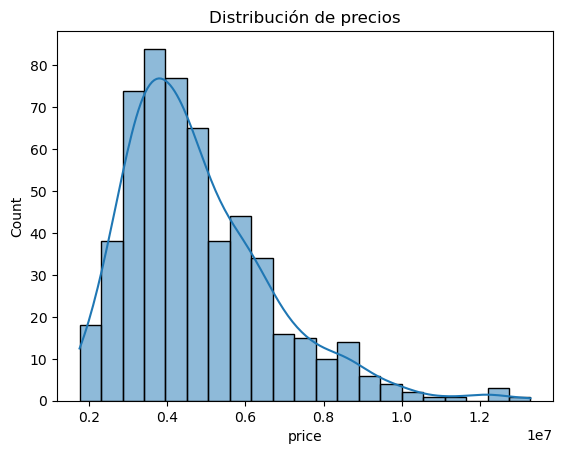

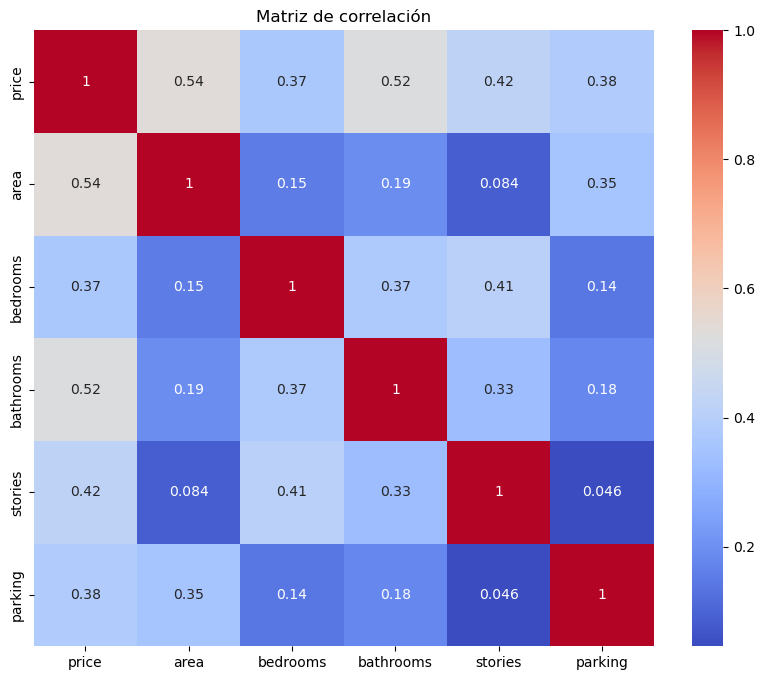

MSE: 587217091347.07
RMSE: 766300.91
R²: 0.8838


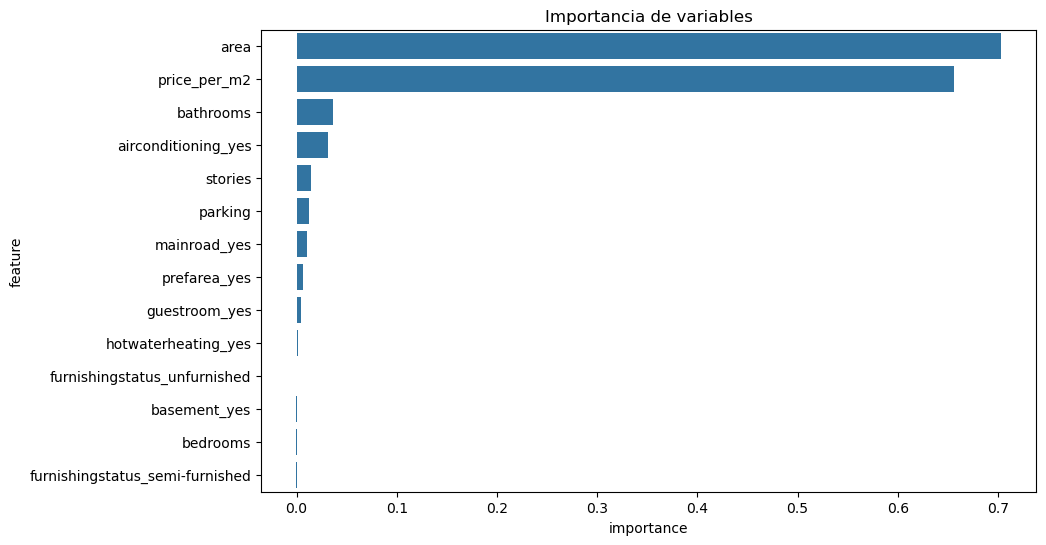

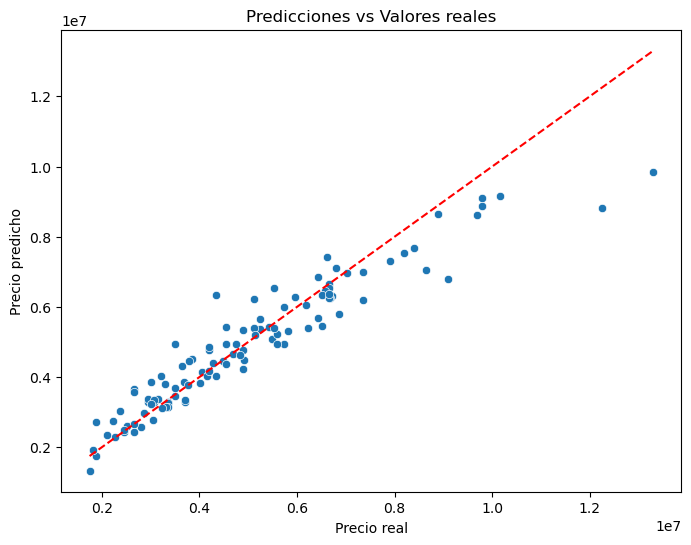

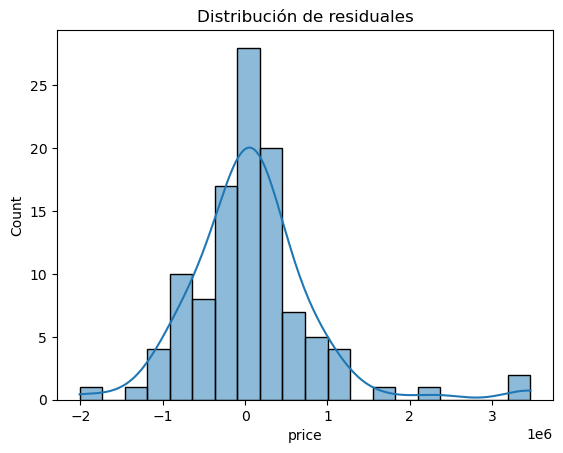

In [6]:
# =========================================
# 1. Importación de librerías
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# =========================================
# 2. Carga del dataset
# =========================================
df = pd.read_csv("ANalista de Datos M43 - Housing.csv")

# Vista general
print("Dimensiones del dataset:", df.shape)
df.head()

# =========================================
# 3. Análisis exploratorio de datos (EDA)
# =========================================
# Info general
df.info()

# Estadísticas descriptivas
df.describe()

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo price
sns.histplot(df['price'], kde=True)
plt.title("Distribución de precios")
plt.show()

# Matriz de correlación (solo numéricas)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# =========================================
# 4. Feature Engineering
# =========================================
# Ejemplo: precio por metro cuadrado
df['price_per_m2'] = df['price'] / df['area']

# =========================================
# 5. Variables Dummy para categóricas
# =========================================
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# =========================================
# 6. Separación de variables predictoras y objetivo
# =========================================
X = df.drop(columns=['price'])
y = df['price']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================================
# 7. Estandarización
# =========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================
# 8. Entrenamiento del modelo de regresión lineal
# =========================================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# =========================================
# 9. Evaluación del modelo
# =========================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# =========================================
# 10. Análisis de importancia de variables
# =========================================
importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance.importances_mean
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Importancia de variables")
plt.show()

# =========================================
# 11. Visualización de resultados
# =========================================
# Comparación real vs predicho
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicciones vs Valores reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Distribución de residuales
residuales = y_test - y_pred
sns.histplot(residuales, kde=True)
plt.title("Distribución de residuales")
plt.show()
